In [1]:
import sys
sys.path.insert(1, '/home/rfradkin/xom/py_scripts')
sys.path.insert(2, '/home/rfradkin/xom/td_repositories')
import importlib
import numpy as np
import pickle as pkl
import utils
import ephesus

In [2]:
import pandas as pd

In [3]:
path = '/home/rfradkin/xom/'
data = '/data/scratch/'
sector_path = '/data/scratch/bhol/sf/'
proc_data_path = '/data/scratch/bhol/proc_data/'

In [4]:
with open(f'{proc_data_path}/raw_data_sector_2', 'rb') as f:
    light_curves = pkl.load(f)

In [5]:
light_curves = light_curves[0:300]

In [6]:
TIC8 = pd.read_csv(f'{data}/xomoons/TIC8/nomi_miss_2min_info.csv')

In [8]:
id_radi_mass_list = []
for i in range(len(light_curves)):
    TIC_id = utils.find_TIC_id(light_curves[i, utils.find(light_curves[i], 'TIC'), 1])
    stam_info = TIC8[TIC8.tici == TIC_id]
    id_radi_mass_list.append([TIC_id, stam_info.radistar.iloc[0], stam_info.massstar.iloc[0]])
id_radi_mass = np.array(id_radi_mass_list)

In [10]:
id_radi_mass

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [38]:
def inje(ligh_curv, id_radi_mass, max_numb_plan = 1):
    
    inje_curv = np.copy(ligh_curv)
    numb_plan_all = np.random.randint(1, max_numb_plan, len(ligh_curv))
    
    for i in range(len(ligh_curv)):
        
        peri = []
        plan_radi = []
        epoc = []
        cosi = []
        
        for j in range(numb_plan_all[i]):
            
            peri.append(np.random.random() * 2 + 2)
            plan_radi.append(np.random.random() * 19 + 1)
            epoc.append(np.random.random() * (light_curves[i, :utils.find(light_curves[i], 'end'), 0][-1] - light_curves[i, 0, 0]))
            cosi.append(np.random.random() * 0.03)
            
        peri = np.array(peri)
        plan_radi = np.array(plan_radi)
        epoc = np.array(epoc)
        cosi = np.array(cosi)
        
        semi_majo = ephesus.retr_smaxkepl(peri, id_radi_mass[i, 2])
        rsma = ephesus.retr_rsma(plan_radi, id_radi_mass[i, 1], semi_majo)

        inje = ephesus.retr_rflxtranmodl((light_curves[i, :utils.find(light_curves[i], 'end'), 0]), peri, epoc, plan_radi, id_radi_mass[i, 1], 
                                 rsma, cosi, ecce=0., sinw=0., booltrap=False)
        
        inje_curv[i, :utils.find(inje_curv[i], 'end'), 1] += inje - 1
        
        inje_time = 0        
        
        if len(np.where(inje < 1)[0]) > 1:
            
            inde = utils.injections_start_stop_index(inje)
            inje_time = utils.index_to_time(inde, ligh_curv[i])
        
        inje_curv[i, utils.find(ligh_curv[i], 'max amplitude'), 1] = (min(inje) - 1) * -1000
        inje_curv[i, utils.find(ligh_curv[i], 'epoch'), 1] = epoc       
        inje_curv[i, utils.find(ligh_curv[i], 'period'), 1] = peri     
        inje_curv[i, utils.find(ligh_curv[i], 'star radius'), 1] = id_radi_mass[1] 
#         inje_curv[i, utils.find(ligh_curv[i], 'planet radius'), 1] = plan_radi   
        inje_curv[i, utils.find(ligh_curv[i], 'star mass'), 1] = id_radi_mass[2]    
        inje_curv[i, utils.find(ligh_curv[i], 'inclination'), 1] = np.arccos(cosi)          
#         inje_curv[i, utils.find(ligh_curv[i], 'number of planets'), 1] = numb_plan_all[i]      
        inje_curv[i, utils.find(ligh_curv[i], 'curve type'), 1] = 'Injected Curve'      
        inje_curv[i, utils.find(ligh_curv[i], 'injection times'), 1] = inje_time
        
    return inje_curv

In [39]:
inje_curv = inje(light_curves, id_radi_mass, 2)

In [40]:
inje_curv[0, -15:]

array([['TIC', 'tess2018234235059-s0002-0000000002733208-0121-s_lc.fits'],
       ['Amplitude [ppt]', 4.549300832498604],
       ['Epoch', array([24.22316307, 20.7073632 ])],
       ['Period [days]', array([2.91913441, 3.27007046])],
       ['Star Radius [R☉]',
        array([2.733409e+06, 2.045710e+00, 1.450000e+00])],
       ['Companion Mass [M☉]', 0],
       ['Star Mass [M☉]', array([2.73352e+06, 2.39419e+00, 1.46000e+00])],
       ['Inclination [°]', array([1.54800865, 1.56583815])],
       ['Curve Type', 'Injected Curve'],
       ['Injection Type', 0],
       ['Detrended Time Scale', False],
       ['Fill Spline Type', 0],
       ['Cut Number', -1],
       ['Injection Times',
        array([[2458355.00804173, 2458355.06082113],
       [2458355.73584124, 2458355.77473126],
       [2458358.27757551, 2458358.33035458],
       [2458358.65397353, 2458358.69286335],
       [2458361.54848155, 2458361.61237172],
       [2458364.49298022, 2458364.53186977],
       [2458364.81798572, 245836

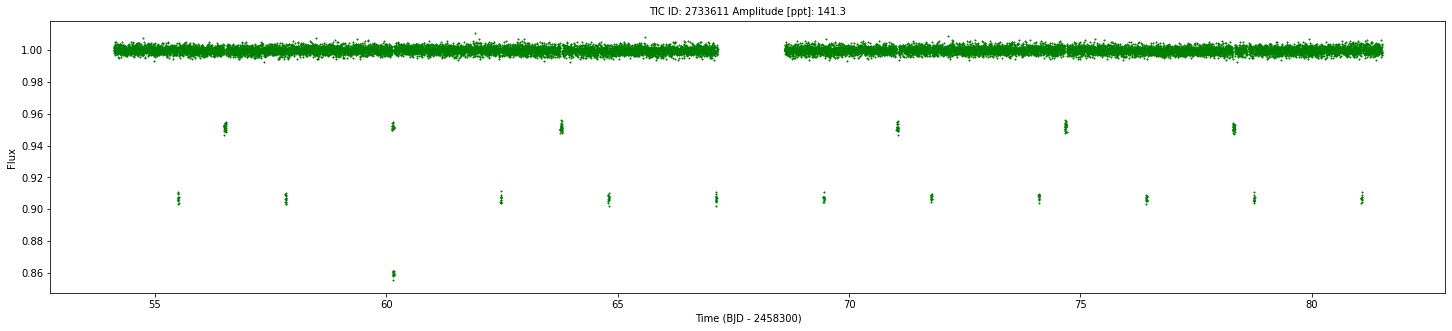

In [51]:
utils.sing_curv_plot(inje_curv[3], ['amplitude'], 'green')

In [89]:
peri = np.array([3, 5])
plan_radi = np.array([1.2])
epoc = np.array([light_curves[0, 300, 0]])
cosi = np.array([0.03])
if len(peri) != len(plan_radi) != epoc != cosi:
    print('Number of planets is not equal')
numb_plan = len(peri)

Number of planets is not equal


In [90]:
semi_majo = []
for i in range(len(light_curves)):
    semi_majo.append(ephesus.retr_smaxkepl(peri, TIC_radi_mass[i, 2]))
semi_majo = np.array(semi_majo)

In [91]:
semi_majo

array([[0.04289625, 0.06030016]])

In [72]:
rsma = []
for i in range(len(light_curves)):
    rsma.append(ephesus.retr_rsma(plan_radi, TIC_radi_mass[i, 1], semi_majo[i]))
rsma = np.array(rsma)

In [76]:
inje = ephesus.retr_rflxtranmodl((light_curves[0, :-20, 0]).astype(float), peri, epoc, plan_radi, TIC_radi_mass[0, 1], 
                         rsma[0], cosi, ecce=0., sinw=0., booltrap=False)
inje -= 1

In [81]:
inje_curv = np.copy(light_curves)
inje_curv[0, :-20, 1] += inje

<AxesSubplot:>

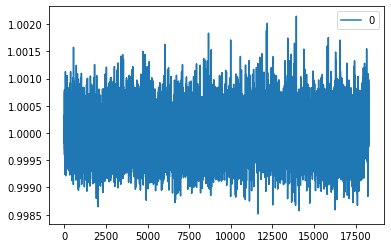

In [84]:
pd.DataFrame(inje_curv[0, :-20, 1]).plot()

In [2]:
from tdpy.util import summgene

In [59]:
time = np.linspace(0., 30., 10000)

In [68]:
import numpy as np
import sys
sys.path.insert(2, '/home/rfradkin/xom/td_repositories')
import ephesus
from tdpy.util import summgene

'''
Using the transit model
'''

# time axis
time = np.array([light_curves[0, :-20, 0], light_curves[0, :-20, 0]])

# orbital periods
peri = np.array([3., 5.])
# mid-transit epochs
epoc = np.array([200., 600.])
# radii of the planets [R_E]
radiplan = np.array([1.2, 3.4])
# radius of the star [R_S]
radistar = np.array([1.0, 1.1])
# total mass [M_S]
masstotl = np.array([1.0, 1.1])
# semi-major axes  [AU] 
smax = ephesus.retr_smaxkepl(peri, masstotl)
# sum of radii divided by the semi-major axis
rsma = ephesus.retr_rsma(radiplan, radistar, smax)
# cosine of inclination
print(rsma)
cosi = np.array([0.03, 0.05])
rfxl = ephesus.retr_rflxtranmodl(light_curves[:, :-20, 0], peri, epoc, radiplan, radistar, rsma, cosi)


# print('rfxl')
# summgene(rfxl)

[0.11622917 0.07267761]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [135]:
def retr_rflxtranmodl(time, peri, epoc, radiplan, radistar, rsma, cosi, ecce=0., sinw=0., booltrap=False):
    
    timeinit = timemodu.time()

    if isinstance(peri, list):
        peri = np.array(peri)

    if isinstance(epoc, list):
        epoc = np.array(epoc)

    if isinstance(radiplan, list):
        radiplan = np.array(radiplan)

    if isinstance(rsma, list):
        rsma = np.array(rsma)

    if isinstance(cosi, list):
        cosi = np.array(cosi)

    if isinstance(ecce, list):
        ecce = np.array(ecce)

    if isinstance(sinw, list):
        sinw = np.array(sinw)
    
    boolinptphys = True#False

    minmtime = np.amin(time)
    maxmtime = np.amax(time)
    numbtime = time.size
    
    dictfact = retr_factconv()
    
    if boolinptphys:
        smax = (radistar + radiplan / dictfact['rsre']) / rsma / dictfact['aurs']
    
    rs2a = radistar / smax / dictfact['aurs']
    imfa = retr_imfa(cosi, rs2a, ecce, sinw)
    sini = np.sqrt(1. - cosi**2)
    rrat = radiplan / dictfact['rsre'] / radistar
    dept = rrat**2 * 1e3
    
    rflxtranmodl = np.ones_like(time)
    
    if booltrap:
        durafull = retr_duratranfull(peri, rs2a, sini, rrat, imfa)
        duratotl = retr_duratrantotl(peri, rs2a, sini, rrat, imfa)
        duraineg = (duratotl - durafull) / 2.
        durafullhalf = durafull / 2.
    else:
        duratotl = retr_duratran(peri, rsma, cosi)
    duratotlhalf = duratotl / 2.

    # Boolean flag that indicates whether there is any transit
    booltran = np.isfinite(duratotl)
    
    numbplan = radiplan.size
    indxplan = np.arange(numbplan)
    if True:
    #if True:
        print('time')
        summgene(time)
        print('epoc')
        print(epoc)
        print('peri')
        print(peri)
        print('cosi')
        print(cosi)
        print('rsma')
        print(rsma)
        print('imfa')
        print(imfa)
        print('radistar')
        print(radistar)
        print('rrat')
        print(rrat)
        print('rs2a')
        print(rs2a)
        print('duratotl')
        print(duratotl)
#         print('durafull')
#         print(durafull)
        print('booltran')
        print(booltran)
        print('indxplan')
        print(indxplan)
        print('radiplan')
        print(radiplan)
    
    for j in indxplan:
        
        if booltran[j]:
            
            minmindxtran = int(np.floor((epoc[j] - minmtime) / peri[j]))
            maxmindxtran = int(np.ceil((maxmtime - epoc[j]) / peri[j]))
            indxtranthis = np.arange(minmindxtran, maxmindxtran + 1)
            
            for n in indxtranthis:
                timetran = epoc[j] + peri[j] * n
                timeshft = time - timetran
                timeshftnega = -timeshft
                timeshftabso = abs(timeshft)
                
                indxtimetotl = np.where(timeshftabso < duratotlhalf[j] / 24.)[0]
                if booltrap:
                    indxtimefull = indxtimetotl[np.where(timeshftabso[indxtimetotl] < durafullhalf[j] / 24.)]
                    indxtimeinre = indxtimetotl[np.where((timeshftnega[indxtimetotl] < duratotlhalf[j] / 24.) & \
                                                                                        (timeshftnega[indxtimetotl] > durafullhalf[j] / 24.))]
                    indxtimeegre = indxtimetotl[np.where((timeshft[indxtimetotl] < duratotlhalf[j] / 24.) & (timeshft[indxtimetotl] > durafullhalf[j] / 24.))]
                
                    rflxtranmodl[indxtimeinre] += 1e-3 * dept[j] * ((timeshftnega[indxtimeinre] - duratotlhalf[j] / 24.) / duraineg[j] / 24.)
                    rflxtranmodl[indxtimeegre] += 1e-3 * dept[j] * ((timeshft[indxtimeegre] - duratotlhalf[j] / 24.) / duraineg[j])
                    rflxtranmodl[indxtimefull] -= 1e-3 * dept[j]
                else:
                    rflxtranmodl[indxtimetotl] -= 1e-3 * dept[j]
                
                if False:
                #if True:
                    print('n')
                    print(n)
                    print('timetran')
                    summgene(timetran)
                    print('timeshft[indxtimetotl]')
                    summgene(timeshft[indxtimetotl])
                    print('timeshftabso[indxtimetotl]')
                    summgene(timeshftabso[indxtimetotl])
                    print('timeshftnega[indxtimetotl]')
                    summgene(timeshftnega[indxtimetotl])
                    print('duratotlhalf[j]')
                    print(duratotlhalf[j])
#                     print('durafullhalf[j]')
#                     print(durafullhalf[j])
                    print('indxtimetotl')
                    summgene(indxtimetotl)
#                     print('indxtimefull')
#                     summgene(indxtimefull)
#                     print('indxtimeinre')
#                     summgene(indxtimeinre)
#                     print('indxtimeegre')
#                     summgene(indxtimeegre)
    
    timetotl = timemodu.time() - timeinit
    timeredu = timetotl / numbtime
    print('retr_rflxtranmodl() took %.3g seconds in total and %g ns per time sample.' % (timetotl, timeredu * 1e9))

    return rflxtranmodl

In [ ]:
retr_rflxtranmodl(time, peri, epoc, radiplan, radistar, rsma, cosi, ecce=0., sinw=0., booltrap=False)

In [18]:
importlib.reload(utils);

In [32]:
utils.find(light_curves[7576], 'Amplitude')

18301

In [61]:
a[0, -15:]

array([['TIC', 'tess2018234235059-s0002-0000000308210185-0121-s_lc.fits'],
       ['Amplitude [ppt]', 24.570521443344262],
       ['Epoch', 24.99877063362335],
       ['Period [days]', 12.114117926065788],
       ['Star Radius [R☉]', 0.5031220689545538],
       ['Companion Mass [M☉]', 8.063965355120134],
       ['Star Mass [M☉]', 0.4893728866282564],
       ['Inclination [°]', 90],
       ['Curve Type', 'Injected Curve'],
       ['Injection Type', 'Full'],
       ['Detrended Time Scale', False],
       ['Fill Spline Type', 0],
       ['Cut Number', -1],
       ['Injection Times',
        array([[2458355.04295391, 2458355.08462157],
       [2458367.15703655, 2458379.31260179]])],
       ['Cut Injected', 0]], dtype=object)

<AxesSubplot:>

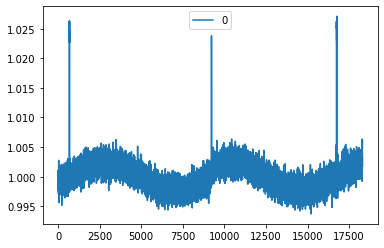

In [76]:
pd.DataFrame(a[0, :-18, 1]).plot()

In [70]:
a[0, -20:]

array([[2458381.513974463, 1.0028453076694144],
       [2458381.5153633417, 1.0017658807866199],
       [2458381.51675222, 1.0031139610621889],
       [2458381.518141099, 0.9992721756405983],
       [0.0, 0.0],
       ['TIC', 'tess2018234235059-s0002-0000000308210185-0121-s_lc.fits'],
       ['Amplitude [ppt]', 24.570521443344262],
       ['Epoch', 24.99877063362335],
       ['Period [days]', 12.114117926065788],
       ['Star Radius [R☉]', 0.5031220689545538],
       ['Companion Mass [M☉]', 8.063965355120134],
       ['Star Mass [M☉]', 0.4893728866282564],
       ['Inclination [°]', 90],
       ['Curve Type', 'Injected Curve'],
       ['Injection Type', 'Full'],
       ['Detrended Time Scale', False],
       ['Fill Spline Type', 0],
       ['Cut Number', -1],
       ['Injection Times',
        array([[2458355.04295391, 2458355.08462157],
       [2458367.15703655, 2458379.31260179]])],
       ['Cut Injected', 0]], dtype=object)

0
[  668   669   670   671   672   673   674   675   676   677   678   679
   680   681   682   683   684   685   686   687   688   689   690   691
   692   693   694   695   696   697   698  9224 16736 16737 16738 16739
 16740 16741 16742 16743 16744 16745 16746 16747 16748 16749 16750 16751
 16752 16753 16754 16755 16756 16757 16758 16759 16760 16761 16762 16763
 16764 16765 16766]
[[  668   698]
 [16736 16766]]


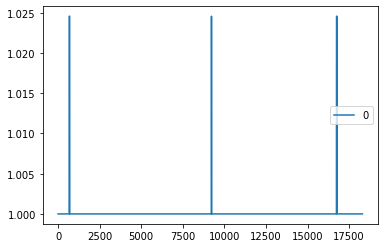

In [89]:
a = injector(light_curves[7576:7577], 0, 1)

In [48]:
from utils import *
import pandas as pd

In [88]:
def injections_start_stop_index(injections):
    tf_injections = np.where(injections > 1)[0]
    print(tf_injections)
    injection_start_stops = []
    current_start_stop = [tf_injections[0]]
    
    for i in range(1, len(tf_injections)  - 1):
        if tf_injections[i - 1] + 1 != tf_injections[i] and tf_injections[i + 1] - 1 != tf_injections[i]:
            pass
        else:
            if tf_injections[i] - tf_injections[i - 1] > 1 and len(current_start_stop) == 0:
                current_start_stop.append(tf_injections[i])
            elif tf_injections[i + 1] - tf_injections[i] > 1 and len(current_start_stop) == 1:
                current_start_stop.append(tf_injections[i])
            if len(current_start_stop) == 2:
                injection_start_stops.append(current_start_stop)
                current_start_stop = []
            
    current_start_stop.append(tf_injections[-1])
    injection_start_stops.append(current_start_stop)
    
    i = 0
    while i < len(injection_start_stops):
        if len(injection_start_stops[i]) == 1:
            injection_start_stops.pop(i)
        else:
            i += 1
    return np.array(injection_start_stops)

In [80]:
def injector(light_curves, start, step, full = True, 
                   beaming = False, ellipsoidal_variation = False, signal_curves = False):
    
    injected_curves = np.copy(light_curves)
#     if(type(signal_curves) == bool):
#         signal_curves = np.zeros((light_curves.shape), dtype = object)
#         signal_curves[:, :, 0] = light_curves[:, :, 0]
#         signal_curves[:, find(light_curves, 'TIC'), 1] = light_curves[:, find(light_curves, 'TIC'), 1]
#         signal_curves[:,find(signal_curves, 'Detrended Time S'), 1] = False
    
    for i in range(start, len(light_curves), step):

        if light_curves[i, find(light_curves[i], 'Amplitude'), 1] != 0:
            raise ValueError('Light Curve Already Injected.')
        information_slots = find(light_curves[i], 'end')
        epoch = 24.99877063362335
        period = 12.114117926065788
        radius_star = 0.5031220689545538
        mass_companion = 8.063965355120134
        mass_star = 0.4893728866282564
        inclination = 90

        params = [epoch, period, radius_star, mass_companion, mass_star, inclination]

        time = np.array(light_curves[i, :information_slots, 0], dtype = float)
        
        full_injections = troia.retr_rflxmodlbhol(time, params)
        print(i)
        if full:
            amplitude = max(full_injections[3] - 1)
            signal = full_injections[0] - 1
            injection_type = 'Full'
        elif beaming and ellipsoidal_variation:
            amplitude = max(full_injections[3] - 1)
            complete_injections = troia.retr_rflxmodlbhol(time, params)
            signal = full_injections[1] + full_injections[2] - 2 
            injection_type = 'Beaming & Ellipsoidal Variation'
        elif ellipsoidal_variation:
            amplitude = max(full_injections[3] - 1)
            signal = full_injections[1] - 1
            injection_type = 'Ellipsoidal Variation'
        elif beaming:
            amplitude = max(full_injections[3] - 1)
            signal = full_injections[2] - 1
            injection_type = 'Beaming'
        else:
            print('No injection type specified.')
            break
        
        injection_times = 0         
        if len(np.where(full_injections[3] > 1)[0]) > 1:
            indexes = injections_start_stop_index(full_injections[3])
            print(indexes)
            injection_times = index_to_time(indexes, light_curves[i])
        pd.DataFrame(full_injections[3]).plot()
        
        injected_curves[i, :information_slots, 1] += signal
        #signal_curves[i, :information_slots, 1] = signal
        
        injected_curves[i, find(light_curves[i], 'amplitude'), 1] = amplitude * 1000#\
        #signal_curves[i, find(light_curves[i], 'amplitude'), 1] = amplitude * 1000
        
        injected_curves[i, find(light_curves[i], 'epoch'), 1] = epoch#\
        #signal_curves[i, find(light_curves[i], 'epoch'), 1] = epoch
        
        injected_curves[i, find(light_curves[i], 'period'), 1] = period#\
        #signal_curves[i, find(light_curves[i], 'period'), 1] = period
        
        injected_curves[i, find(light_curves[i], 'star radius'), 1] = radius_star#\
        #signal_curves[i, find(light_curves[i], 'star radius'), 1] = radius_star
        
        injected_curves[i, find(light_curves[i], 'companion mass'), 1] = mass_companion#\
        #signal_curves[i, find(light_curves[i], 'companion mass'), 1] = mass_companion
        
        injected_curves[i, find(light_curves[i], 'star mass'), 1] = mass_star#\
        #signal_curves[i, find(light_curves[i], 'star mass'), 1] = mass_star
        
        injected_curves[i, find(light_curves[i], 'inclination'), 1] = inclination#\
        #signal_curves[i, find(light_curves[i], 'inclination'), 1] = inclination

        injected_curves[i, find(light_curves[i], 'injection type'), 1] = injection_type#\
        #signal_curves[i, find(light_curves[i], 'injection type'), 1] = injection_type        
        
        injected_curves[i, find(light_curves[i], 'curve type'), 1] = 'Injected Curve'
        #signal_curves[i, find(light_curves[i], 'curve type'), 1] = 'Signal Curve'
        
        injected_curves[i, find(light_curves[i], 'injection times'), 1] = injection_times

    return injected_curves#, signal_curves